# 1.数据集的抽取

load_iris():鸢尾花数据集，3类别、4特征、150个样本
load_boston():波士顿房价数据集，13特征、506个样本
load_digits():手写数字集，10类别、64特征、1797样本
load_breast_cancer():乳腺癌数据，2类别、30特征、569样本
load_diabets():糖尿病数据集，10特征、442样本
load_wine():红酒数据集，3类别，13特征、178样本
load_linnerud():体能训练数据集，3特诊、20样本
load_sample_image():加载单个图像样本
load_svmlight_file():加载svmlight格式数据

In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#加载iris数据集
iris = datasets.load_iris()
features = iris.data#样本
target = iris.target#标签
variable_name = iris.feature_names
print(np.char.center("样本的形状：",20,fillchar = "*"))
print(features.shape)
print(np.char.center("标签的形状：",20,fillchar = "*"))
print(target.shape) 
print(np.char.center("变量的名字：",20,fillchar = "*"))
print(variable_name) 
print(np.char.center("标签的类别：",20,fillchar = "*"))
print(np.unique(target)) 



*******样本的形状：*******
(150, 4)
*******标签的形状：*******
(150,)
*******变量的名字：*******
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
*******标签的类别：*******
[0 1 2]


# 2.数据预处理

数据预处理函数如下（位于sklearn.preprocessing）：
使用dir(preprocessing)查看包里有什么预处理函数
preprocessing.scale():标准化
preprocessing.minmax_scale():最大值最小值标准化
preprocessing.StandardScaler():数据标准化
preprocessing.MaxAbsScaler():绝对值最大标准化
preprocessing.RobustScaler():带离群值数据集标准化
preprocessing.QuantileTransformer()
preprocessing.PowerTransformer()
preprocessing.Normalizer()
preprocessing.OrdinalEncoder()
preprocessing.LabelEncoder()
preprocessing.MultiLabelBinarizer()
preprocessing.OneHotEncoder():独热编码
preprocessing.KBinsDiscretizer():连续数据离散化
preprocessing.FunctionTransformer()
preprocessing.Binarizer()
preprocessing.PolynomialFeatures()
preprocessing.Imputer():弥补缺失值

In [10]:
import numpy as np
from sklearn import preprocessing


In [9]:
#help(preprocessing.scale)查看函数的具体用法
#preprocessing.scale(x,axis,with_mean,with_std)axis默认为按照0轴转换，with_mean/with_std要转换成均值/方差为什么的函数
x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
x_scale_1 = preprocessing.scale(x,axis=0,with_mean=0,with_std=1)
x_scale_2 = preprocessing.scale(x,axis=1,with_mean=0,with_std=1)
print(np.char.center("按照0轴转换",20,fillchar="*"))
print(x_scale_1)
print(np.char.center("按照1轴转换",20,fillchar ="*"))
print(x_scale_2)

*******按照0轴转换*******
[[0.30618622 0.61237244 0.91855865 1.22474487]
 [1.53093109 1.83711731 2.14330352 2.44948974]
 [2.75567596 3.06186218 3.3680484  3.67423461]]
*******按照1轴转换*******
[[ 0.89442719  1.78885438  2.68328157  3.57770876]
 [ 4.47213595  5.36656315  6.26099034  7.15541753]
 [ 8.04984472  8.94427191  9.8386991  10.73312629]]


D:\anaconda\envs\py36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
#help(preprocessing.minmax_scale)默认按照0轴
x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
x_scale_1 = preprocessing.minmax_scale(x)
x_scale_2 = preprocessing.minmax_scale(x,axis = 1)
print(np.char.center("按照默认的0轴转换",20,fillchar = "*"))
print(x_scale_1)
print(np.char.center("按照1轴转换",20,fillchar = "*"))
print(x_scale_2)


*****按照默认的0轴转换******
[[0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [1.  1.  1.  1. ]]
*******按照1轴转换*******
[[0.         0.33333333 0.66666667 1.        ]
 [0.         0.33333333 0.66666667 1.        ]
 [0.         0.33333333 0.66666667 1.        ]]


D:\anaconda\envs\py36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
#help(preprocessing.StandardScaler)-- z score---最后得到一个均值为0 方差为1的序列
#x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
x = np.random.normal(2,3,1000)
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
print(x_scaled.mean(axis=0),x_scaled.std(axis=0))

-2.7533531010703882e-17 1.0


D:\anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [31]:
#preprocessing.RobustScaler()处理有异常值的数据
y = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,10000000]])
rob_scale = preprocessing.RobustScaler()
y_rob = rob_scale.fit_transform(y)
print(y_rob.mean(axis=0),y_rob.std(axis=0))

[0.        0.        0.9999982] [0.74535599 0.74535599 1.73204873]


In [36]:
#preprocessing.normalize()正则化，主要用于文本分类和聚类,把数据转换成1范数
#help(preprocessing.normalize)
x = np.array([[1,-1,2],[2,0,0],[0,1,-1]])
x_normalized = preprocessing.normalize(x)
print(x_normalized)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


D:\anaconda\envs\py36\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [47]:
#特征二值化，将数值型特征转换为bool型
#help(preprocessing.binarize)#默认threshold=0
x = np.array([[1,-1,2],[2,0,0],[0,1,-1]])
x_binarized = preprocessing.binarize(x,threshold=1)
print(x_binarized)

[[0 0 1]
 [1 0 0]
 [0 0 0]]


In [50]:
#将数据标签/特征进行独热编码，通常对标签编码
y1 = [1,2,3,4,5,6,7,8,9,10]
y1_hot = preprocessing.OneHotEncoder().fit(y1).transform(y1)
print(y1_hot)

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0


D:\anaconda\envs\py36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\anaconda\envs\py36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [53]:
#preprocessing.PolynomialFeatures
#对特征进行多项式的构造
#parameters:degree(控制多项式的阶数)，interaction_only(default=False,若为True则只有交叉项)，include_bias(1,default=True)
x_train = np.array([[1,3],[2,6],[3,7],[4,8]])
x_train_tran = preprocessing.PolynomialFeatures(degree=3).fit_transform(x_train)
print(x_train_tran)

[[  1.   1.   3.   1.   3.   9.   1.   3.   9.  27.]
 [  1.   2.   6.   4.  12.  36.   8.  24.  72. 216.]
 [  1.   3.   7.   9.  21.  49.  27.  63. 147. 343.]
 [  1.   4.   8.  16.  32.  64.  64. 128. 256. 512.]]


# 特征选择

#选择K个得分最高的特征//从特征得分的角度选择特征
feature_selection.SelectKBest
feature_selection.chi2  or f_classif or mutualinfo_classif//适用于分类问题
feature_selection.f_regression//适用于回归
feature_selection.mutual_info_regression//适用于回归
#无监督特征选择//从方差即信息量的角度筛选特征
feature_selection.VarianceThreshold
#递归式特征消除
feature_selection.RFE
feature_selection.RFECV
#特征选择
feature_selection.SelectFromModel
lasso



In [4]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest,chi2,f_regression  #最好使用version_ scipy1.2.1


In [5]:
# SelectKBest---chi2
#Recall that the chi-square test measures dependence between stochastic variables, so using this 
#function “weeds out” the features that are the most likely to be independent of class and 
#therefore irrelevant for classification.
digits = load_digits()
data = digits.data
target = digits.target
print(data.shape)
data_new = SelectKBest(chi2,k=20).fit_transform(data,target)
print(data_new.shape)

(1797, 64)
(1797, 20)


In [6]:
#SelectKBest---f_regression
data_new_1  = SelectKBest(score_func =f_regression,k=25 ).fit_transform(data,target)
print(data_new_1.shape)

(1797, 25)


D:\anaconda\envs\py36\lib\site-packages\sklearn\feature_selection\univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)


In [13]:
#feature_selection.VarianceThreshold()计算每一个变量（特征）的方差，方差越大变化越大包含信息越多，反之，比如极端情况下
#某一个变量的取值都为1，那么该变量对于分类来言就没有什么用。该方法只适合离散型变量，若为连续性需要离散
from sklearn.feature_selection import VarianceThreshold
x = [[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
x_new = VarianceThreshold(threshold=(0.2,0.1,0.2)).fit_transform(x)
print(x_new)

[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


In [22]:
#递归式特征消除
#feature_selection.RFE
#feature_selection.RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE,RFECV
from sklearn.datasets import load_iris
import numpy as np


#解释一下“交叉验证方法”
交叉验证方法：KFold/StratifiedKFold
from skearn.model_selection import StratifiedKFold,KFold
均表示K折交叉验证，but，StratifiedKFold使用的是层次分类的随机抽样方法

In [25]:
#加载数据集
iris = load_iris()
x,y = iris.data,iris.target
#创建用于特征选择的模型
svc = SVC(kernel = "linear")#svc属于SVM中分类的支持向量机
#使用RFE用了全部的数据相当于在训练集上选择最好的模型
rfe = RFE(estimator = svc)
x_rfe = rfe.fit(x,y).transform(x)
print(np.char.center("原数据集的形状",25,fillchar="*"))
print(x.shape)
print(np.char.center("子集选择后的形状",25,fillchar = "*"))
print(x_rfe.shape)

*********原数据集的形状*********
(150, 4)
*********子集选择后的形状********
(150, 2)


In [28]:
#为了能够更好地体现模型的泛化能力可以选择RFECV方法
rfecv = RFECV(estimator=svc,cv = StratifiedKFold(10))
x_rfecv = rfecv.fit(x,y).transform(x)
print(x_rfecv.shape)

(150, 4)


#feature_selection.SelectFromModel()特征选择
#分为两种：一种是基于惩罚项（比如L1/L2正则化对应LASSO和Rige）另一种是基于树模型(ID3/C4.5/CART/GBDT/XGBOST)


In [12]:
#基于L1正则化（Lasso）
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

iris = load_iris()
x,y = iris.data,iris.target
x_new = SelectFromModel(LogisticRegression(penalty="l1",C=0.1)).fit_transform(x,y)#C表示正则化的强度，越小则正则化越严重
x_new_1 = SelectFromModel(LogisticRegression(penalty="l2",C=1)).fit_transform(x,y)

In [13]:
#查看结果
import numpy as np
print(np.char.center("原始数据的形状",25,fillchar="*"))
print(x.shape)
print(np.char.center("l1正则化后的形状",25,fillchar="*"))
print(x_new.shape)
print(np.char.center("L2正则化后的形状",25,fillchar= "*"))
print(x_new_1.shape)

*********原始数据的形状*********
(150, 4)
********l1正则化后的形状********
(150, 3)
********L2正则化后的形状********
(150, 3)


In [16]:
#使用树模型
from  sklearn.ensemble import GradientBoostingClassifier as gbdt
x_new_2 = SelectFromModel(gbdt()).fit_transform(x,y)

In [17]:
print(x_new_2.shape)

(150, 2)


# 特征降维

#PCA
sklearn.decomposition.PCA
sklearn.decomposition.KernelPCA针对线性不可分的数据集，通过非线性核函数把样本空间映射到高维空间，然后在高维空间对数据进行主成分分析
PCA是线性降维，KPCA是非线性降维
sklearn.decomposition.IncrementalPCA增量主成分分析，针对大数据集，为了解决内存限制，将数据分成多个批次，通过增量方式逐步主成分分析
sklearn.decomposition.MiniBatchSparsePCA
sklearn.decomposition.SparsePCA稀疏主成分分析，针对主成分分析结果解释性鶸的问题，凸显主成分中的主要组成成分。
**************************************
sklearn.decomposition.FactorAnalysis
sklearn.decomposition.TruncatedSVD
sklearn.decomposition.FastlCA
***************************************
sklearn.decomposition.DictionaryLearning
sklearn.decomposition.MiniBathDictionaryLearning
sklearn.decomposition.dit_learning
sklearn.decomposition.dict_learning_online
**************************************
sklearn.decomposition.LatentDirichletAllocation
sklearn.decomposition.NMF
sklearn.decomposition.SparseCoder


#maniflod
sklearn.manifold.LocallyLinearEmbedding
sklearn.manifold.lsomap
sklearn.manifold.MDS
sklearn.manifold.t-SNE
sklearn.manifold.SpectralEmbedding
#聚类降维

In [22]:
#sklearn.decomposition.PCA
from sklearn.decomposition import PCA
import numpy as np
x = np.array([[1,2,-1,0,3],[2,3,4,-1,-2],[3,0,5,1,3],[8,7,6,-6,-4],[4,5,6,7,8],[1,4,5,7,8],[9,0,8,3,2],[5,3,-3,-2,4],[11,12,1,3,4],[5,4,3,6,3],[1,2,3,4,5],[0,1,0,4,2],[3,4,2,-3,-4],[2,0,-3,-4,5],[8,7,6,0,5],[8,5,-4,-5,3]])
model_pca = PCA(n_components = 2)
model_pca_2 = PCA(n_components =0.85)
x_new_1 = model_pca.fit_transform(x)
x_new_2 = model_pca_2.fit_transform(x)
#查看经过pca后的数据集形状,也就是查看保留个几个主成分
print(np.char.center("原始数据集的shape:",30,fillchar = "*"))
print(x.shape)
print(np.char.center("保留两个主成分后的数据：",30,fillchar = "*"))
print(x_new_1.shape)
print(np.char.center("保留了0.85方差解释率的数据：",30,fillchar = "*"))
print(x_new_2.shape)
print("\n","方法二：直接查看主成分个数和主成分的方差解释率")
print(model_pca.n_components_,model_pca_2.n_components_)
print(model_pca.explained_variance_ratio_,model_pca_2.explained_variance_ratio_)

*********原始数据集的shape:*********
(16, 5)
*********保留两个主成分后的数据：*********
(16, 2)
*******保留了0.85方差解释率的数据：*******
(16, 3)

 方法二：直接查看主成分个数和主成分的方差解释率
2 3
[0.40937279 0.28797221] [0.40937279 0.28797221 0.19738803]


In [24]:
#kernelPCA
import math
from sklearn.decomposition import KernelPCA
x = []
y = []
N = 500
for i in range(N):
    deg = np.random.randint(0,360)
    if np.random.randint(0,2)%2 ==0:
        x.append([6*math.sin(deg),6*math.cos(deg)])
        y.append(1)
    else:
        x.append([15*math.sin(deg),15*math.cos(deg)])
        y.append(0)
x = np.array(x)
y = np.array(y)

kpca = KernelPCA(kernel = "rbf",n_components = 14)
x_kpca = kpca.fit_transform(x)
print(x_kpca.shape)

(500, 14)


In [26]:
#sklearn.decomposition.IncrementalPCA增量主成分分析
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import sparse

digits = load_digits()
x = digits.data
#xsparse = sparse.csr_matrix(x)#压缩稀疏矩阵
modelIPCA = IncrementalPCA(n_components = 6,batch_size = 200)
modelIPCA.fit(x)#训练模型
x_transform = modelIPCA.transform(x)
print(x_transform.shape,modelIPCA.n_components_)

(1797, 6) 6


In [28]:
#MinibatchSparsePCA
from sklearn.datasets import make_friedman1
from sklearn.decomposition import MiniBatchSparsePCA
x,_ = make_friedman1(n_samples = 200,n_features = 30,random_state = 0)
MiniPCA = MiniBatchSparsePCA(n_components = 10,batch_size = 50,random_state = 0)
MiniPCA.fit(x)
x_transform = MiniPCA.transform(x)
print(x_transform.shape)

(200, 10)


In [30]:
#因子分析
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
x,_ = load_digits(return_X_y = True)
trans = FactorAnalysis(n_components = 5,random_state = 0)
x_trans = trans.fit_transform(x)
print(x_trans.shape)

(1797, 5)


# 分类模型

学习目标：每一种方法的原理是什么，分类方法的发展史是什么，如何去应用，差不多一个方法一个小模块。
决策树模型
sklearn.tree.DecisionTreeClassifier()
集成模型
sklearn.ensemble.BaggingClassifier()袋装法
sklearn.ensemble.AdaBoostClassifier()提升法
sklearn.ensemble.RandomForestClassifier()随机森林
sklearn.ensemble.ExtraTreesClassifier()极限随机树
sklearn.ensemble.RandomTreesEmbedding()嵌入式完全随机树
sklearn.GradientBoostingClassifier()梯度提升树
sklearn.VotingClassifier()投票分类法
xgboost
支持向量机sklearn.svm
sklearn.svm.SVC()
sklearn.svm.NuSVC()
sklearn.svm.LinearSVC()
......
无监督学习sklearn.neighbors
sklearn.neighbors.NearestNeighbors()
sklearn.neighbors.NearestCentroid()
sklearn.neighbors.KNeighborsClassfier()
sklearn.neighbors.KDTree()
sklearn.neighbors.KNeighborsTransformer()
判别分析sklearn.discriminant_analysis
sklearn.discriminant_nalysis.LinearDiscriminantAnalysis()LDA
sklearn.discriminant_nalysis.QuadraticDiscriminantAnalysis()二次判别分析
高斯过程分类
sklearn.gaussian_process.GaussianProcessClassifier()
贝叶斯分类
sklearn.naive_bayes.GaussianNB()朴素贝叶斯
sklearn.naive_bayes.MultinomialNB()多项式朴素贝叶斯
sklearn.naive_bayes.BernoulliNB()伯努利朴素贝叶斯







决策树的理论基础，具体查看网页：https://zhuanlan.zhihu.com/p/339380585


### 决策树

In [1]:
#决策树-ID3
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import export_graphviz#可视化
from sklearn.metrics import accuracy_score#计算准确率
from sklearn.metrics import precision_score#查准率：预测为正的样本中，实际上也是正例的比例
from sklearn.metrics import recall_score#查全率/召回率，实际为正的样本中被预测为正的样本所占比例
from sklearn.metrics import f1_score
#以鸢尾花数据集分类为例
iris = datasets.load_iris()
x = iris.data
y = iris.target
names = iris.feature_names
#划分训练集和测试集
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)#自带shuffle
#训练ID3决策树
dtree = DecisionTreeClassifier(criterion = "entropy")
dtree.fit(xtrain,ytrain)
#使用10次交叉验证进行预测
score = cross_val_score(dtree,x,y,cv=10,scoring = "accuracy")
print(np.char.center("模型的预测精度-交叉验证",30,fillchar = "*"))
print(np.mean(score))
print(np.char.center("重要的特征",30,fillchar="*"))
print(dtree.feature_importances_)
#法二：留出法
ypredict = dtree.predict(xtest)
acc = accuracy_score(ytest,ypredict)#准确率
acc_macro = precision_score(ytest,ypredict,average = "macro")#宏平均查准率
acc_micro = precision_score(ytest,ypredict,average = "micro")#微平均查准率
recall_macro = recall_score(ytest,ypredict,average = "macro")#宏查全率
recall_micro = recall_score(ytest,ypredict,average = "micro")#微查全率
F1 = f1_score(ytest,ypredict,average  = "macro")
#print(np.char.center("留出法预测结果",30,fillchar = "*"))
#print(ypredict)
print(np.char.center("留出法预测集准确率",30,fillchar = "*"))
print(acc)
print(np.char.center("留出法预测集精确率-宏平均",30,fillchar = "*"))
print(acc_macro)
print(np.char.center("留出法预测集精确率-微平均",30,fillchar = "*"))
print(acc_micro)
print(np.char.center("F1",30,fillchar = "*"))
print(F1)



*********模型的预测精度-交叉验证*********
0.9533333333333334
************重要的特征*************
[0.         0.03154079 0.87062348 0.09783573]
**********留出法预测集准确率***********
0.9777777777777777
********留出法预测集精确率-宏平均*********
0.9814814814814815
********留出法预测集精确率-微平均*********
0.9777777777777777
**************F1**************
0.9781305114638448


In [2]:
#查看sklearn 版本
import sklearn
print("sklearn version is {}".format(sklearn.__version__))

sklearn version is 0.24.2


In [3]:
#决策树的可视化
#绘制决策树
import pydotplus
from IPython.display import Image
import os
from sklearn import tree

In [4]:
#添加环境变量
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [5]:
dot_tree = tree.export_graphviz(dtree,feature_names=names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
graph.write_png("out_01.png")#图片直接输入到该machine learning 文件夹


True

In [14]:
#绘制ROC曲线,一般适用于二分类，多分类也可以但是结果比较难看，
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(ytest,dtree.predict_proba(xtest),pos_label = 1)
plt.plot(fpr,tpr,label = "roc_curve")
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.show()

ValueError: multiclass format is not supported

In [1]:
#######C4.5#################
import numpy as np
import pandas as pd
import math
import collections

In [2]:
#导入数据集
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
x = iris.data
y = iris.target
feature_labels = ["花萼长度","花萼宽度","花瓣长度","花瓣宽度"]
y_labels = iris.target_names
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [3]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)
dataset = pd.concat([X,Y],axis=1)


In [4]:
dataset = np.array(dataset)

In [5]:
dataset = dataset.tolist()

In [9]:
#每个特征的种类
labels_full = {}
for i in range(len(feature_labels)):
    labellist = [example[i] for example in dataset]
    uniquelabel = set(labellist)
    labels_full[feature_labels[i]] = uniquelabel

In [10]:
#计算初始的信息熵，也就是不分类之前的信息熵
def calcshannonent(dataset):
    #计算出数据集的总数
    numentries = len(dataset)
    #统计标签
    labelcounts = collections.defaultdict(int)
    #循环整个数据集，得到分类标签
    for featvec in dataset:
        currentlabel = featvec[-1]
        labelcounts[currentlabel] = labelcounts[currentlabel]+1
    
    shannonent = 0.0
    
    for key in labelcounts:
        #计算出当前分类标签占总标签的比例个数
        prob = float(labelcounts[key])/numentries
        #求对数
        shannonent = prob*math.log2(prob)
    return shannonent


In [11]:
#查看初始的信息熵,因为计算的时候仅仅涉及到标签数据集，所以dataset=y
print(calcshannonent(dataset))


-0.5283208335737187


In [12]:
#判断各个样本的各个属性是否一致、
def judgeEqualLabels(dataset):
    #计算出样本集中一共有多少个属性，最后一个为类别
    feature_leng = len(dataset[0])-1
    #计算出一共有多少个数据
    data_leng = len(dataset)
    #标记每个属性中第一个属性值是什么
    first_feature = ""
    #各个属性集是否完全一致
    is_equal = True
    #遍历全部属性
    for i in range(feature_leng):
        #得到第一个样本的第i个属性
        frist_feature = dataset[0][i]
        #与样本集中所有数据进行对比，看看在属性上是否都一致
        for _ in range(1,data_leng):
            if frist_feature != dataset[_][i]:
                return False
    return is_equal
            

In [13]:
#获取每个特征值的数量，为后面计算信息增益做准备
def splitdataset(dataset,axis,value):
    redataset = []
    for featvec in dataset:
        if featvec[axis] == value:
            reducedfeatvec = featvec[:axis]#将该特征值以前的数据保存下来
            reducedfeatvec.extend(featvec[axis+1:])
            redataset.append(reducedfeatvec)
    return redataset

def choosebestfeaturetosplit(dataset,feature_labels):#选择最好的数据集划分特征
    numFeatures = len(dataset[0])-1
    #计算出基础信息熵
    baseentropy = calcshannonent(dataset)
    #基础信息增益
    bestinfogain = 0.0
    bestfeature = -1
    #对每个特征值进行求信息熵：
    for i in range(numFeatures):
        featlist = [example[i] for example in dataset]
        uniquevals = set(featlist)
        newentropy = 0.0
        for value in uniquevals:
            subdataset = splitdataset(dataset = dataset,axis=i,value = value)
            prob = len(subdataset)/float(len(dataset))
            newentropy += prob*calcshannonent(subdataset)
            
        infogain = baseentropy-newentropy
        infogain = infogain/(newentropy+0.1)
        
        if infogain>bestinfogain:
            bestinfogain = infogain
            bestfeature = i
    return bestfeature
        

In [14]:
#创建树的函数
def createtree(dataset,feature_labels):
    #所有数据集的分类标签
    classlist = [example[-1] for example in dataset]
    
    if classlist.count(classlist[0])==len(classlist):
        return classlist[0]
    if len(dataset[0]) == 1 or judgeEqualLabels(dataset):
        return majorityCnt(classlist)
    bestFeat = choosebestfeaturetosplit(dataset = dataset,feature_labels = feature_labels)
    print(bestFeat)
    bestFeatlabel = feature_labels[bestFeat]
    print(bestFeatlabel)
    mytree = {bestFeatlabel:{}}
    del(feature_labels[bestFeat])
    featvalues = [example[bestFeat] for example in dataset]
    uniquevals = set(featvalues)
    
    for value in uniquevals:
        sublabels = feature_labels[:]
        subtree = createtree(splitdataset(dataset = dataset,axis = bestFeat,value = value),sublabels)
        mytree[bestFeatlabel][value] = subtree
    return mytree
    

In [15]:
#打印决策树
mytree = createtree(dataset,feature_labels)
print(mytree)

0
花萼长度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
1
花瓣长度
-1
花瓣宽度
0
花萼宽度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
-1
花瓣宽度
{'花萼长度': {4.7: 0.0, 5.5: {'花瓣宽度': {0.0: 0.0, 1.0: 1.0}}, 5.0: {'花瓣宽度': {0.0: 0.0, 1.0: 1.0}}, 4.9: {'花瓣宽度': {0.0: 0.0, 1.0: 1.0, 2.0: 2.0}}, 5.1: {'花瓣宽度': {0.0: 0.0, 1.0: 1.0}}, 4.6: 0.0, 5.4: {'花瓣宽度': {0.0: 0.0, 1.0: 1.0}}, 4.4: 0.0, 4.8: 0.0, 4.3: 0.0, 5.8: {'花萼宽度': {2.7: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}, 2.6: 1.0, 4.0: 0.0, 2.8: 2.0}}, 7.0: 1.0, 7.1: 2.0, 4.5: 0.0, 5.9: {'花萼宽度': {3.2: 1.0, 3.0: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}}}, 5.6: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}, 6.9: {'花萼宽度': {3.2: 2.0, 3.1: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}}}, 6.5: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}, 6.4: {'花萼宽度': {2.9: 1.0, 3.1: 2.0, 3.2: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}, 2.8: 2.0, 2.7: 2.0}}, 6.6: 1.0, 6.0: {'花萼宽度': {2.2: {'花瓣宽度': {1.0: 1.0, 2.0: 2.0}}, 3.4: 1.0, 3.0: 2.0, 2.9: 1.0, 2.7: 1.0}}, 6.1: {'花

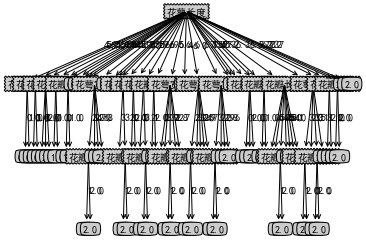

In [30]:
#决策树的可视化
import matplotlib.pyplot as plt
import matplotlib
#显示中文
matplotlib.rcParams["font.sans-serif"] =["Simhei"]
matplotlib.rcParams['font.serif'] = ['Simhei']
#分叉节点
decisionNode = dict(boxstyle = "sawtooth",fc = "0.8")
#叶子节点
leafNode = dict(boxstyle = "round4",fc = "0.8")
#箭头样式
arrow_args = dict(arrowstyle = "<-")

def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    '''
    绘制节点
    nodeTxt:描述该节点的文本信息
    centerPt:文本的坐标
    parentPt:点的坐标
    nodeType:节点类型，分为叶子节点和决策节点
    '''
    createPlot.ax1.annotate(nodeTxt,xy = parentPt,xycoords = "axes fraction",xytext = centerPt,textcoords = "axes fraction",
                           va = "center",ha = "center",bbox = nodeType,arrowprops = arrow_args)
    
def getNumLeafs(mytree):
    '''
    获取叶子节点的数目
    '''
    numLeafs = 0
    firststr = list(mytree.keys())[0]
    secondDict= mytree[firststr]
     #遍历叶子节点
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == "dict":
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(mytree):
    maxDepth = 0
    firststr = list(mytree.keys())[0]
    secondDict = mytree[firststr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == "dict":
            thisDepth = 1+getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt,parentPt,txtstring):
    #计算x轴的中间位置
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    #计算y轴的中间位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    #进行绘制
    createPlot.ax1.text(xMid,yMid,txtstring)
    
def plottree(mytree,parentPt,nodeTxt):
    #计算叶子节点数
    numLeafs = getNumLeafs(mytree = mytree)
    #计算树的深度
    depth = getTreeDepth(mytree = mytree)
    #得到根节点的信息内容
    firststr = list(mytree.keys())[0]
    #计算出当前根节点在所有子节点的中间坐标
    cntrPt = (plottree.xOff+(1.0+float(numLeafs))/2.0/plottree.totalW,plottree.yOff)
    #绘制该节点与父节点的联系
    plotMidText(cntrPt,parentPt,nodeTxt)
    #绘制该节点
    plotNode(firststr,cntrPt,parentPt,decisionNode)
    #得到当前根节点对应的子树
    secondDict = mytree[firststr]
    #计算出新的y轴偏移量
    plottree.yOff = plottree.yOff - 1.0/plottree.totalD
    
    for key in secondDict.keys():
        if isinstance(secondDict[key],dict):
            plottree(secondDict[key],cntrPt,str(key))
        else:
            plottree.xOff = plottree.xOff + 1.0/plottree.totalW
            plotNode(secondDict[key],(plottree.xOff,plottree.yOff),cntrPt,leafNode)
            plotMidText((plottree.xOff,plottree.yOff),cntrPt,str(key))
    plottree.yOff = plottree.yOff + 1.0/plottree.totalD

def createPlot(inTree):
    """
    需要绘制的决策树
    :param inTree: 决策树字典
    :return:
    """
    # 创建一个图像
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    # 计算出决策树的总宽度
    plottree.totalW = float(getNumLeafs(inTree))
    # 计算出决策树的总深度
    plottree.totalD = float(getTreeDepth(inTree))
    # 初始的x轴偏移量，也就是-1/2W，每次向右移动1/W，也就是第一个叶子节点绘制的x坐标为：1/2W，第二个：3/2W，第三个：5/2W，最后一个：(W-1)/2W
    plottree.xOff = -0.5/plottree.totalW
    # 初始的y轴偏移量，每次向下或者向上移动1/D
    plottree.yOff = 1.0
    # 调用函数进行绘制节点图像
    plottree(inTree, (0.5, 1.0), '')
    # 绘制
    plt.show()
if __name__ == "__main__":
    createPlot(mytree)

In [ ]:
#这是没有把连续变量值离散化以后的结果，正常的分类应该要先把连续变量离散化处理

In [31]:
#cart决策树
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import export_graphviz#可视化
from sklearn.metrics import accuracy_score#计算准确率
from sklearn.metrics import precision_score#查准率：预测为正的样本中，实际上也是正例的比例
from sklearn.metrics import recall_score#查全率/召回率，实际为正的样本中被预测为正的样本所占比例
from sklearn.metrics import f1_score
#以鸢尾花数据集分类为例
iris = datasets.load_iris()
x = iris.data
y = iris.target
names = iris.feature_names
#划分训练集和测试集
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)#自带shuffle
#训练ID3决策树
dtree = DecisionTreeClassifier(criterion = "gini")
dtree.fit(xtrain,ytrain)
#使用10次交叉验证进行预测
score = cross_val_score(dtree,x,y,cv=10,scoring = "accuracy")
print(np.char.center("模型的预测精度-交叉验证",30,fillchar = "*"))
print(np.mean(score))
print(np.char.center("重要的特征",30,fillchar="*"))
print(dtree.feature_importances_)
#法二：留出法
ypredict = dtree.predict(xtest)
acc = accuracy_score(ytest,ypredict)#准确率
acc_macro = precision_score(ytest,ypredict,average = "macro")#宏平均查准率
acc_micro = precision_score(ytest,ypredict,average = "micro")#微平均查准率
recall_macro = recall_score(ytest,ypredict,average = "macro")#宏查全率
recall_micro = recall_score(ytest,ypredict,average = "micro")#微查全率
F1 = f1_score(ytest,ypredict,average  = "macro")
#print(np.char.center("留出法预测结果",30,fillchar = "*"))
#print(ypredict)
print(np.char.center("留出法预测集准确率",30,fillchar = "*"))
print(acc)
print(np.char.center("留出法预测集精确率-宏平均",30,fillchar = "*"))
print(acc_macro)
print(np.char.center("留出法预测集精确率-微平均",30,fillchar = "*"))
print(acc_micro)
print(np.char.center("F1",30,fillchar = "*"))
print(F1)



*********模型的预测精度-交叉验证*********
0.96
************重要的特征*************
[0.04794521 0.         0.55313488 0.39891992]
**********留出法预测集准确率***********
0.9555555555555556
********留出法预测集精确率-宏平均*********
0.9444444444444445
********留出法预测集精确率-微平均*********
0.9555555555555556
**************F1**************
0.952153110047847


###########集成学习模型（ensemble Learning）############
集成学习主要分为了三大类：
Bagging
决策树的缺点是高方差，也就是在不同的测试集上的结果差异会比较大，而Bagging的目的就是降低方差。
方法：
1.通过bootstrap的方法，从一个训练集中反复抽取多个（B个）样本集，
2.用B个样本分别拟合出B个模型
3.将B个模型的预测结果求平均值，得到Bagging的预测结果
Boosting
是bagging的改版，每个树木的生成继承了前面的树的经验。
Adboosting:初始时，每个训练的样本给出相等的权重，后期注重加权那些训练错误的样本
Random Forest
随机森林是bagging的改版，使得每个树之间的相关性降低。它迫使每个模型只能考虑一部分特征值

### 集成模型
sklearn.ensemble.BaggingClassifier()袋装法
sklearn.ensemble.AdaBoostClassifier()提升法
sklearn.ensemble.RandomForestClassifier()随机森林
sklearn.ensemble.ExtraTreesClassifier()极限随机树
sklearn.ensemble.RandomTreesEmbedding()嵌入式完全随机树
sklearn.GradientBoostingClassifier()梯度提升树
sklearn.VotingClassifier()投票分类法
xgboost
gbdt

In [36]:
#sklearn.ensemble.BaggingClassifier()袋装法
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import export_graphviz#可视化
from sklearn.metrics import accuracy_score#计算准确率
from sklearn.metrics import precision_score#查准率：预测为正的样本中，实际上也是正例的比例
from sklearn.metrics import recall_score#查全率/召回率，实际为正的样本中被预测为正的样本所占比例
from sklearn.metrics import f1_score
import matplotlib as plt
#加载数据
iris = load_iris()
x = iris.data
y = iris.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)
clf_bagging = BaggingClassifier(n_estimators =5)
clf_bagging.fit(xtrain,ytrain)


BaggingClassifier(n_estimators=5)

In [41]:
#模型评价
#法二：留出法
ypredict =clf_bagging.predict(xtest)#预测结果
acc = accuracy_score(ytest,ypredict)#准确率
acc_macro = precision_score(ytest,ypredict,average = "macro")#宏平均查准率
acc_micro = precision_score(ytest,ypredict,average = "micro")#微平均查准率
recall_macro = recall_score(ytest,ypredict,average = "macro")#宏查全率
recall_micro = recall_score(ytest,ypredict,average = "micro")#微查全率
F1 = f1_score(ytest,ypredict,average  = "macro")
#print(np.char.center("留出法预测结果",30,fillchar = "*"))
#print(ypredict)
print(np.char.center("留出法预测集准确率",30,fillchar = "*"))
print(acc)
print(np.char.center("留出法预测集精确率-宏平均",30,fillchar = "*"))
print(acc_macro)
print(np.char.center("留出法预测集精确率-微平均",30,fillchar = "*"))
print(acc_micro)
print(np.char.center("F1",30,fillchar = "*"))
print(F1)

**********留出法预测集准确率***********
0.9777777777777777
********留出法预测集精确率-宏平均*********
0.9824561403508771
********留出法预测集精确率-微平均*********
0.9777777777777777
**************F1**************
0.9776576576576578


In [42]:
#sklearn.ensemble.AdaBoostClassifier()提升法
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(n_estimators = 5)
scores = cross_val_score(clf_adaboost,x,y,cv=10,scoring = "accuracy")
print("十折交叉验证精度")
print(scores.mean())

十折交叉验证精度
0.9466666666666667


In [1]:
#gradient boosting(GBDT)
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris


In [3]:
iris = load_iris()
x = iris.data
y = iris.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)
clf_gradBoost = GradientBoostingClassifier(n_estimators= 5)
clf_gradBoost.fit(xtrain,ytrain)
y_predict = clf_gradBoost.predict(xtest)

In [4]:
from sklearn.metrics import accuracy_score#计算准确率
from sklearn.metrics import precision_score#查准率：预测为正的样本中，实际上也是正例的比例
from sklearn.metrics import recall_score#查全率/召回率，实际为正的样本中被预测为正的样本所占比例
from sklearn.metrics import f1_score

acc = accuracy_score(ytest,y_predict)
print("acc:",acc)


acc: 0.9333333333333333


In [10]:
#random forest
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=5,max_depth=5)
clf_RF.fit(xtrain,ytrain)
y_predict = clf_RF.predict(xtest)
acc = accuracy_score(ytest,y_predict)
print(acc)

0.9555555555555556


In [14]:
#xgboost
#http://www.uml.org.cn/sjjmwj/201903092.asp
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
#加载数据集
iris = load_iris()
x = iris.data
y = iris.target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)


In [19]:
#训练模型
clf_xg = XGBClassifier(n_estimators = 10)
clf_xg.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [22]:
#预测
y_predict = clf_xg.predict(xtest)
from sklearn.metrics import f1_score
F1 = f1_score(ytest,y_predict,average = "macro")
print("f1:",F1)

f1: 1.0


In [23]:
#输出重要特征
print(clf_xg.feature_importances_)#基于信息增益的原理

[0.04548972 0.02610681 0.59637344 0.33203006]
